# Hierarchal Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
0,18.0,8,130,3504,12.0,70,usa
1,15.0,8,165,3693,11.5,70,usa
2,18.0,8,150,3436,11.0,70,usa
3,16.0,8,150,3433,12.0,70,usa
4,15.0,8,190,3850,8.5,70,usa


In [3]:
df['origin'].value_counts()

usa       169
japan      54
europe     48
Name: origin, dtype: int64

In [4]:
df_w_dummies = pd.get_dummies(df)
df_w_dummies

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,130,3504,12.0,70,0,0,1
1,15.0,8,165,3693,11.5,70,0,0,1
2,18.0,8,150,3436,11.0,70,0,0,1
3,16.0,8,150,3433,12.0,70,0,0,1
4,15.0,8,190,3850,8.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
266,36.0,4,84,2370,13.0,82,0,0,1
267,27.0,4,90,2950,17.3,82,0,0,1
268,44.0,4,52,2130,24.6,82,1,0,0
269,32.0,4,84,2295,11.6,82,0,0,1


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)
scaled_data

array([[0.2393617 , 1.        , 0.45652174, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.64673913, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.56521739, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.93085106, 0.2       , 0.0326087 , ..., 1.        , 0.        ,
        0.        ],
       [0.61170213, 0.2       , 0.20652174, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.19565217, ..., 0.        , 0.        ,
        1.        ]])

In [7]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

<Axes: >

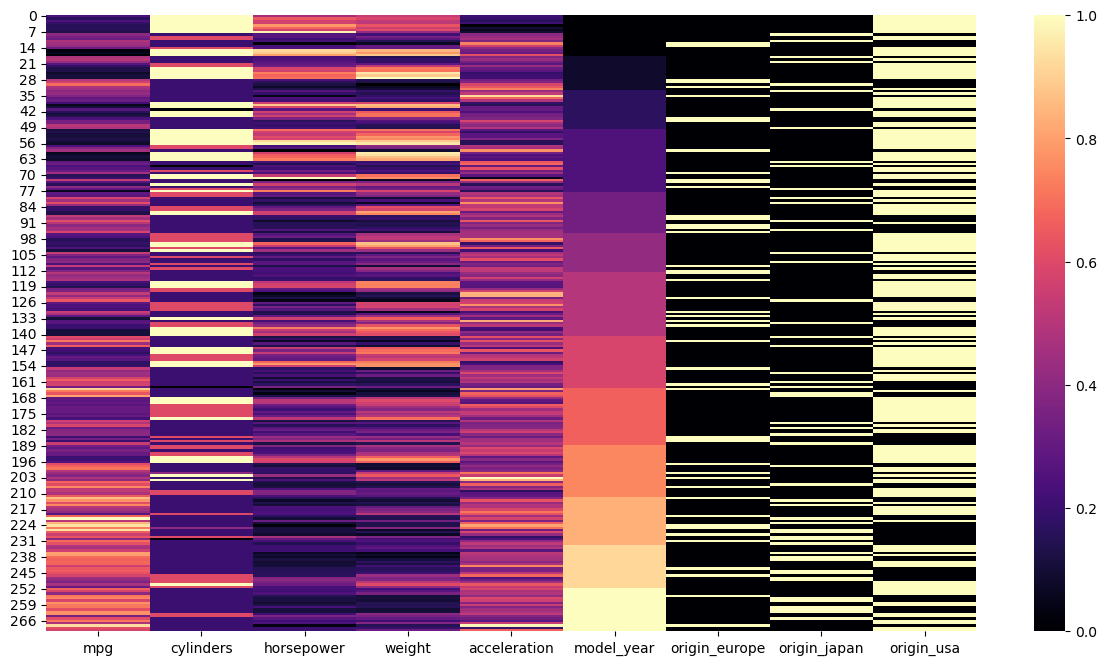

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(scaled_df, cmap='magma')

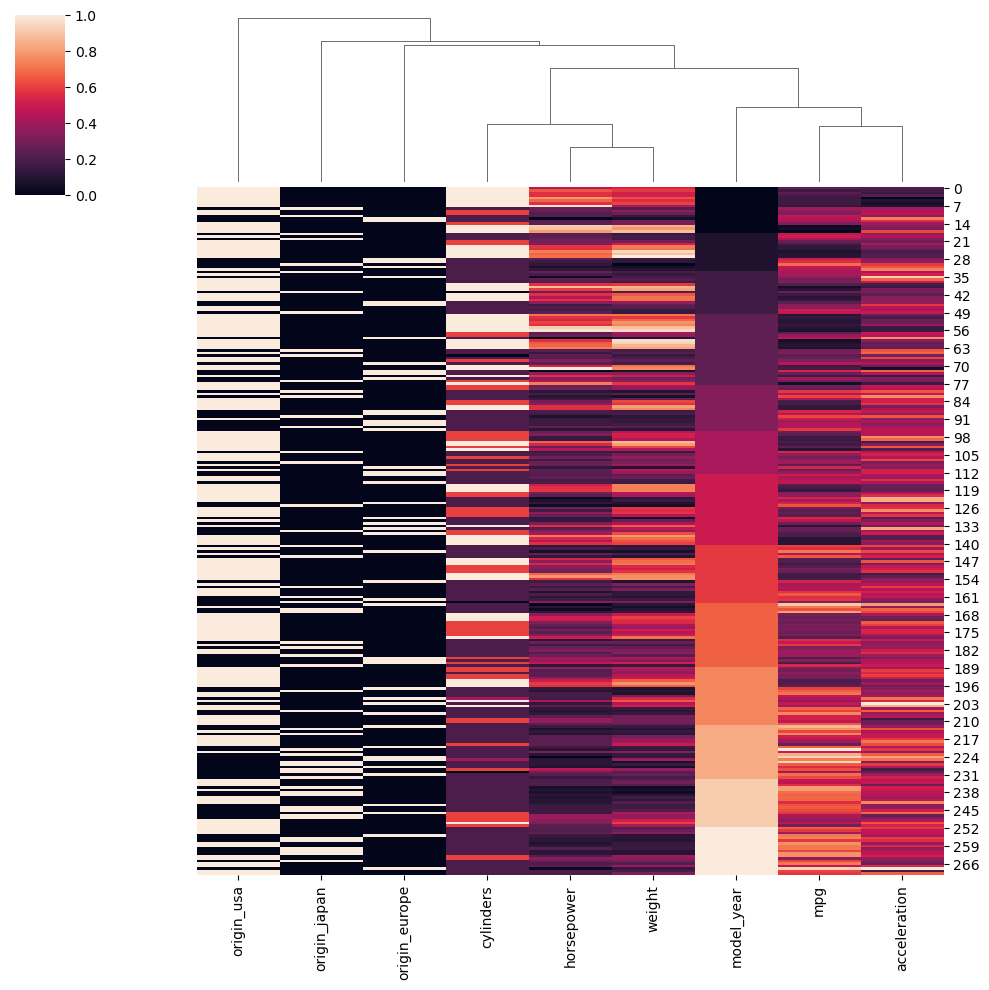

In [9]:
sns.clustermap(scaled_df, row_cluster=False)

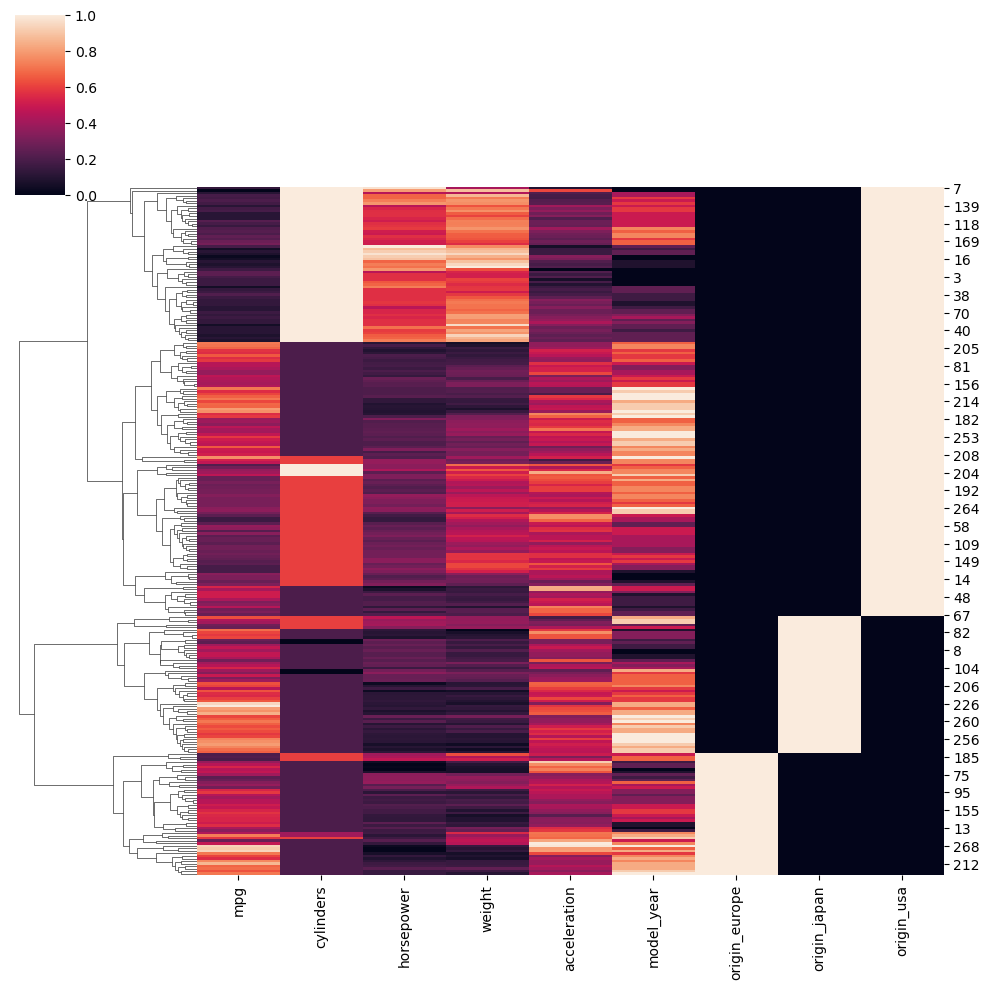

In [10]:
sns.clustermap(scaled_df, col_cluster=False)

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
model = AgglomerativeClustering(n_clusters=4)

In [13]:
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 2, 2, 0, 3, 3, 3, 1, 0, 1, 0,
       0, 3, 3, 3, 3, 3, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 3, 3, 3, 1, 3, 3,
       3, 2, 2, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 1, 0,
       1, 0, 0, 2, 3, 3, 2, 2, 3, 2, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 3, 3,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 1, 0,
       2, 0, 2, 2, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0,
       2, 3, 2, 1, 2, 3, 3, 3, 3, 1, 0, 2, 0, 1, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 3, 3, 2,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 0], dtype=int64)

<Axes: xlabel='mpg', ylabel='weight'>

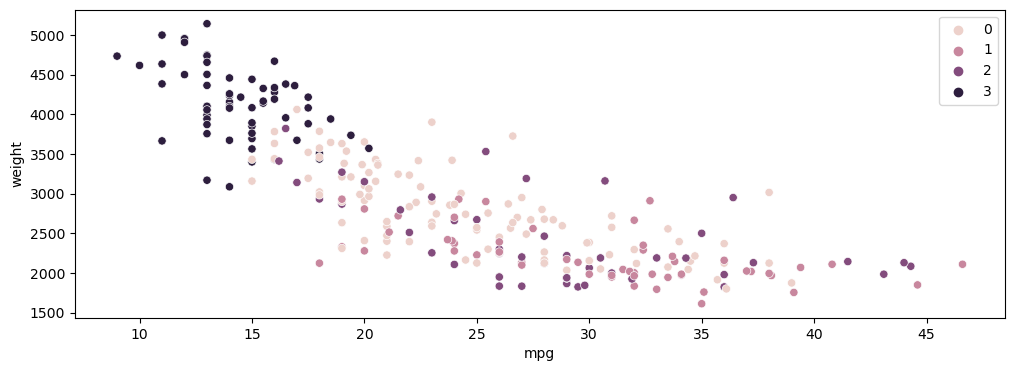

In [14]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels)

## Exploring Number of Clusters with Dendrograms

Assuming every point starts as its own cluster

In [15]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [16]:
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([180, 216, 251, 269, 217, 139, 165, 183, 178, 233, 259, 212, 164,
       255, 190, 247, 168, 263, 254, 211, 174, 265, 151, 268, 136, 258,
       208, 179, 220, 154, 135, 191, 157, 201, 176, 153, 188, 261, 218,
       166, 221, 207, 241, 159, 219, 210, 227, 108, 260, 192, 146, 238,
       264, 249, 229, 242, 103, 169, 160,  95, 237, 195, 252,  67, 235,
       209, 175, 131, 173, 156, 245, 196, 172, 231, 253, 125, 177, 197,
       256, 167, 266, 132,  79, 155, 232, 161, 225, 162, 193, 270, 213,
       236, 198, 149, 147, 234, 129, 202,  98, 223, 228, 171, 142, 257,
       163, 224, 214, 262, 205, 158, 244, 182, 144, 250, 194, 138, 137,
       111, 267, 105, 145,  86, 184, 115, 150,  77, 118, 140, 230, 185,
        81, 199, 203, 128, 243, 204,  82, 106, 186, 152,  75,  97, 114,
        52,  48, 141,  80,  39, 126, 239, 117, 143, 181, 109, 222, 121,
       134, 133, 246, 110,  83, 113, 200,  91,  70,  87, 206, 127,  54,
        65, 104, 226,  63,  66, 100,  68, 215, 101,  69, 148,  5

## Linkage Model

In [17]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [18]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[ 24.        ,  34.        ,   1.41421356,   2.        ],
       [ 71.        ,  80.        ,   1.41421356,   2.        ],
       [266.        , 267.        ,   1.41421356,   2.        ],
       ...,
       [534.        , 535.        ,  39.2173431 , 267.        ],
       [491.        , 536.        ,  40.44749683, 269.        ],
       [232.        , 537.        ,  63.82005954, 270.        ]])

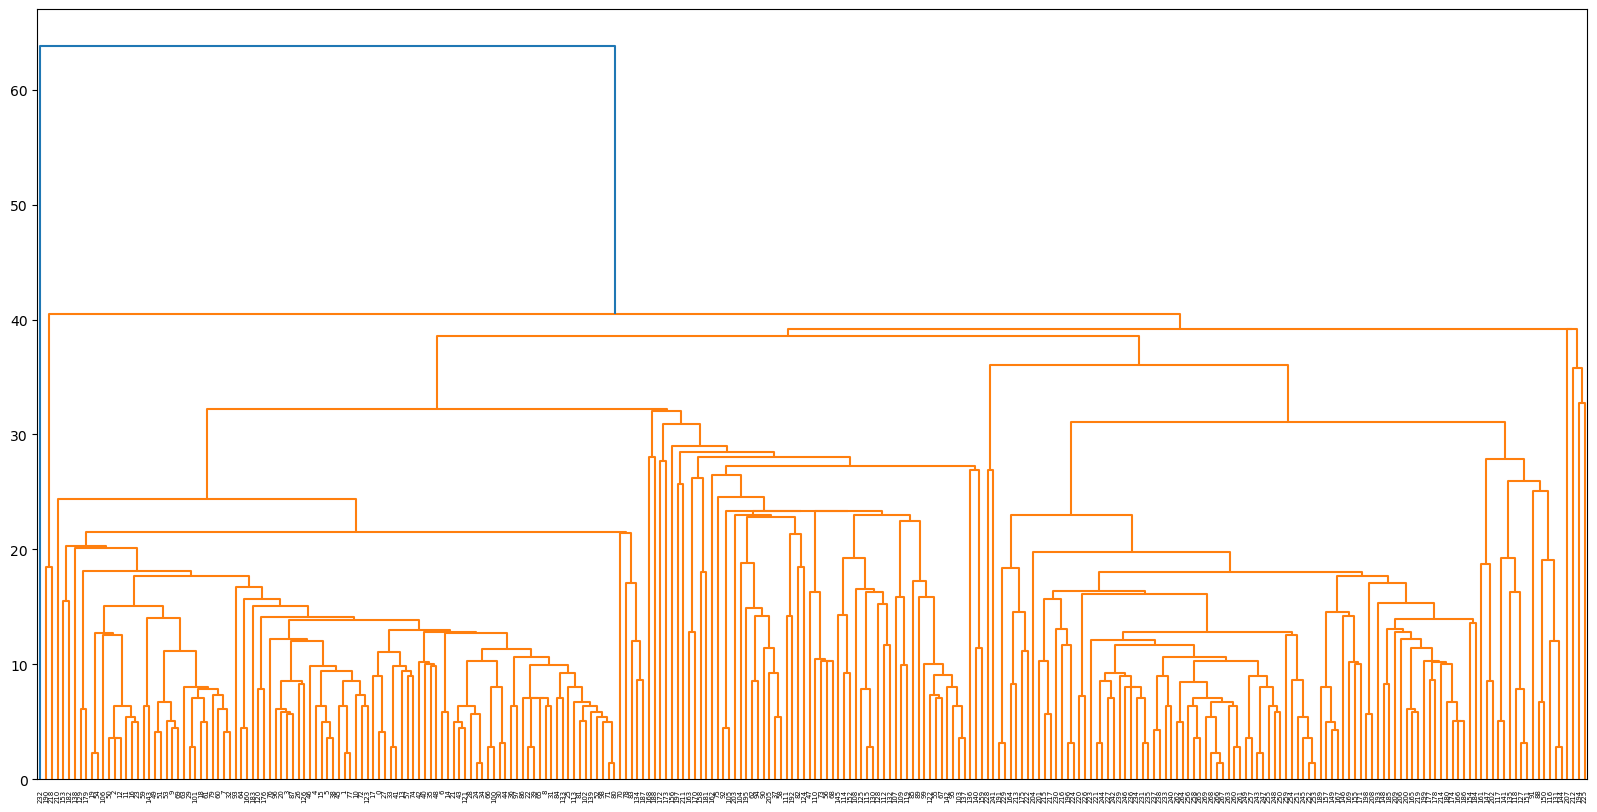

In [19]:
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(linkage_matrix)

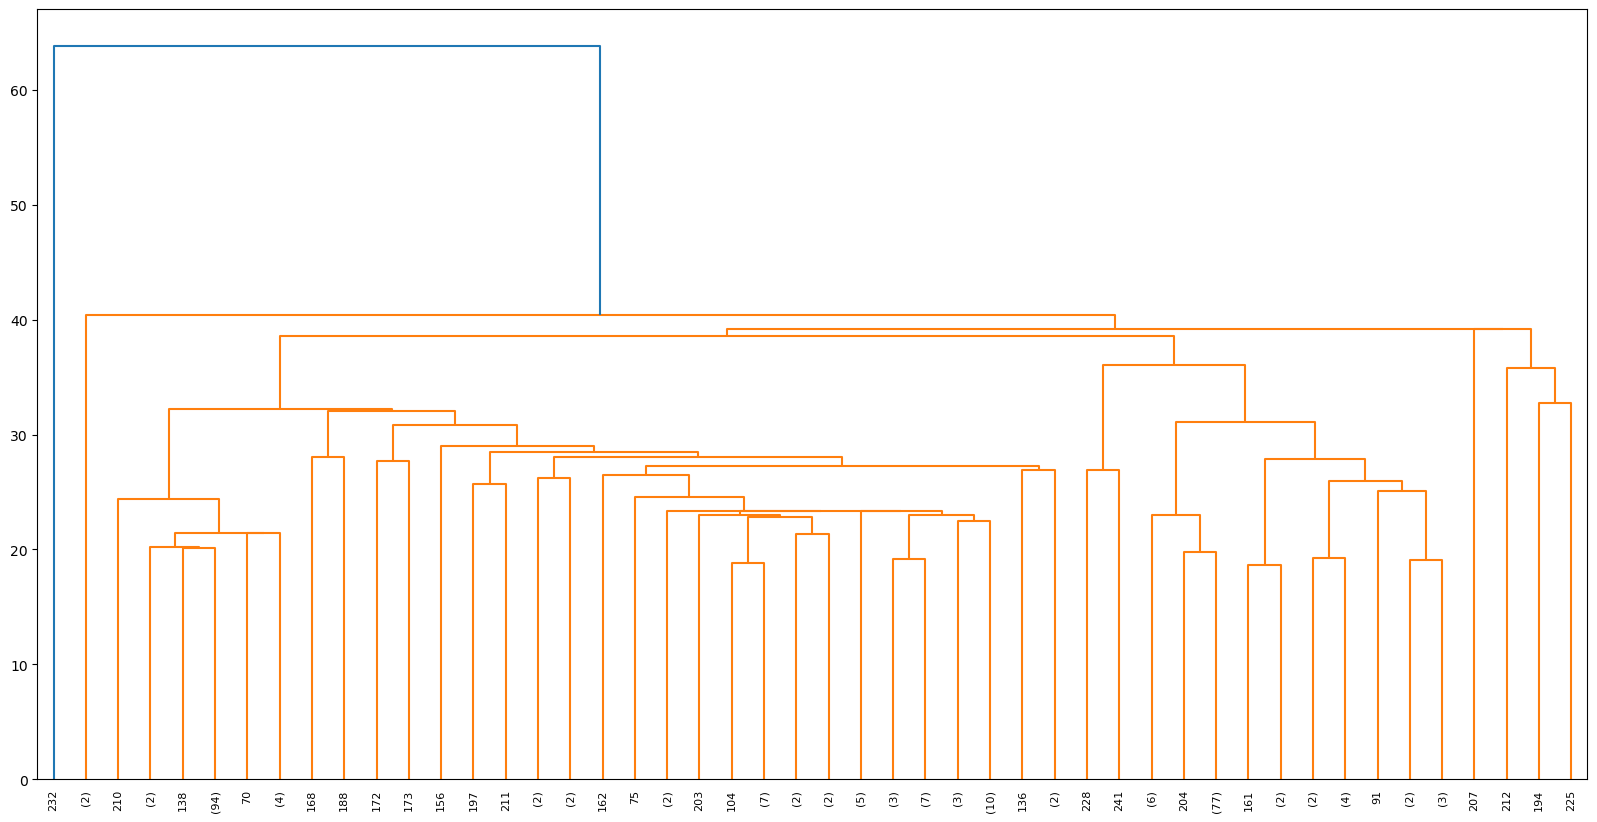

In [20]:
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=48)

## Choosing a Threshold Distance

In [21]:
scaled_df.describe()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.400968,0.474539,0.304147,0.368531,0.439182,0.514453,0.177122,0.199262,0.623616
std,0.212379,0.338046,0.207282,0.240895,0.170673,0.298006,0.382478,0.400184,0.485374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239362,0.200000,0.157609,0.155656,0.325153,0.250000,0.000000,0.000000,0.000000
50%,0.393617,0.200000,0.239130,0.313864,0.429448,0.500000,0.000000,0.000000,1.000000
75%,0.558511,0.600000,0.391304,0.542104,0.539877,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
max_miles_per_galon_car_idx = scaled_df['mpg'].idxmax()
max_miles_per_galon_car_idx

221

In [23]:
min_miles_per_galon_car_idx = scaled_df['mpg'].idxmin()
min_miles_per_galon_car_idx

17

In [24]:
a = scaled_df.iloc[max_miles_per_galon_car_idx]
b = scaled_df.iloc[min_miles_per_galon_car_idx]
dist = np.linalg.norm(a - b)
dist

2.3178409785366827

Euclidean distance

In [25]:
np.sqrt(len(scaled_df.columns))

3.0

## Creating a Model Based on Distance Threshold

The linkage distance threshold above which, clusters will not be merged

In [26]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [27]:
cluster_labels = model.fit_predict(scaled_data)
cluster_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 9, 9, 0, 1, 1, 9, 4, 4, 4, 0, 5, 0, 9,
       9, 4, 4, 4, 4, 4, 1, 1, 0, 1, 5, 0, 5, 1, 5, 5, 4, 4, 4, 0, 4, 4,
       4, 1, 1, 5, 5, 0, 4, 4, 4, 4, 4, 4, 4, 9, 9, 1, 4, 4, 4, 4, 0, 5,
       0, 5, 9, 1, 4, 4, 1, 1, 4, 1, 0, 4, 9, 9, 0, 5, 0, 5, 9, 9, 4, 4,
       1, 1, 0, 5, 1, 1, 0, 1, 9, 9, 9, 9, 8, 4, 9, 4, 0, 5, 9, 5, 0, 9,
       3, 9, 1, 3, 5, 5, 3, 8, 8, 8, 9, 9, 5, 5, 3, 0, 2, 9, 2, 9, 3, 5,
       1, 8, 3, 0, 1, 8, 8, 8, 8, 0, 7, 3, 5, 0, 8, 2, 8, 2, 2, 2, 8, 8,
       8, 3, 5, 0, 5, 7, 7, 0, 3, 0, 3, 7, 0, 6, 2, 8, 8, 2, 2, 2, 2, 2,
       2, 8, 7, 0, 7, 0, 7, 7, 0, 1, 1, 1, 0, 2, 2, 7, 2, 2, 8, 8, 8, 3,
       6, 7, 7, 3, 2, 3, 2, 7, 0, 3, 7, 2, 2, 7, 3, 6, 7, 6, 7, 7, 7, 2,
       3, 6, 7, 6, 3, 3, 6, 6, 3, 0, 0, 3, 6, 7, 7, 7, 6, 7, 6, 6, 7, 7,
       7, 3, 6, 6, 3, 0, 0, 2, 2, 2, 7, 7, 7, 3, 6, 6, 7, 7, 6, 6, 6, 2,
       2, 6, 7, 7, 3, 7, 7], dtype=int64)

In [28]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Linkage Matrix

In [29]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[ 24.        ,  34.        ,   1.41421356,   2.        ],
       [ 71.        ,  80.        ,   1.41421356,   2.        ],
       [266.        , 267.        ,   1.41421356,   2.        ],
       ...,
       [534.        , 535.        ,  39.2173431 , 267.        ],
       [491.        , 536.        ,  40.44749683, 269.        ],
       [232.        , 537.        ,  63.82005954, 270.        ]])

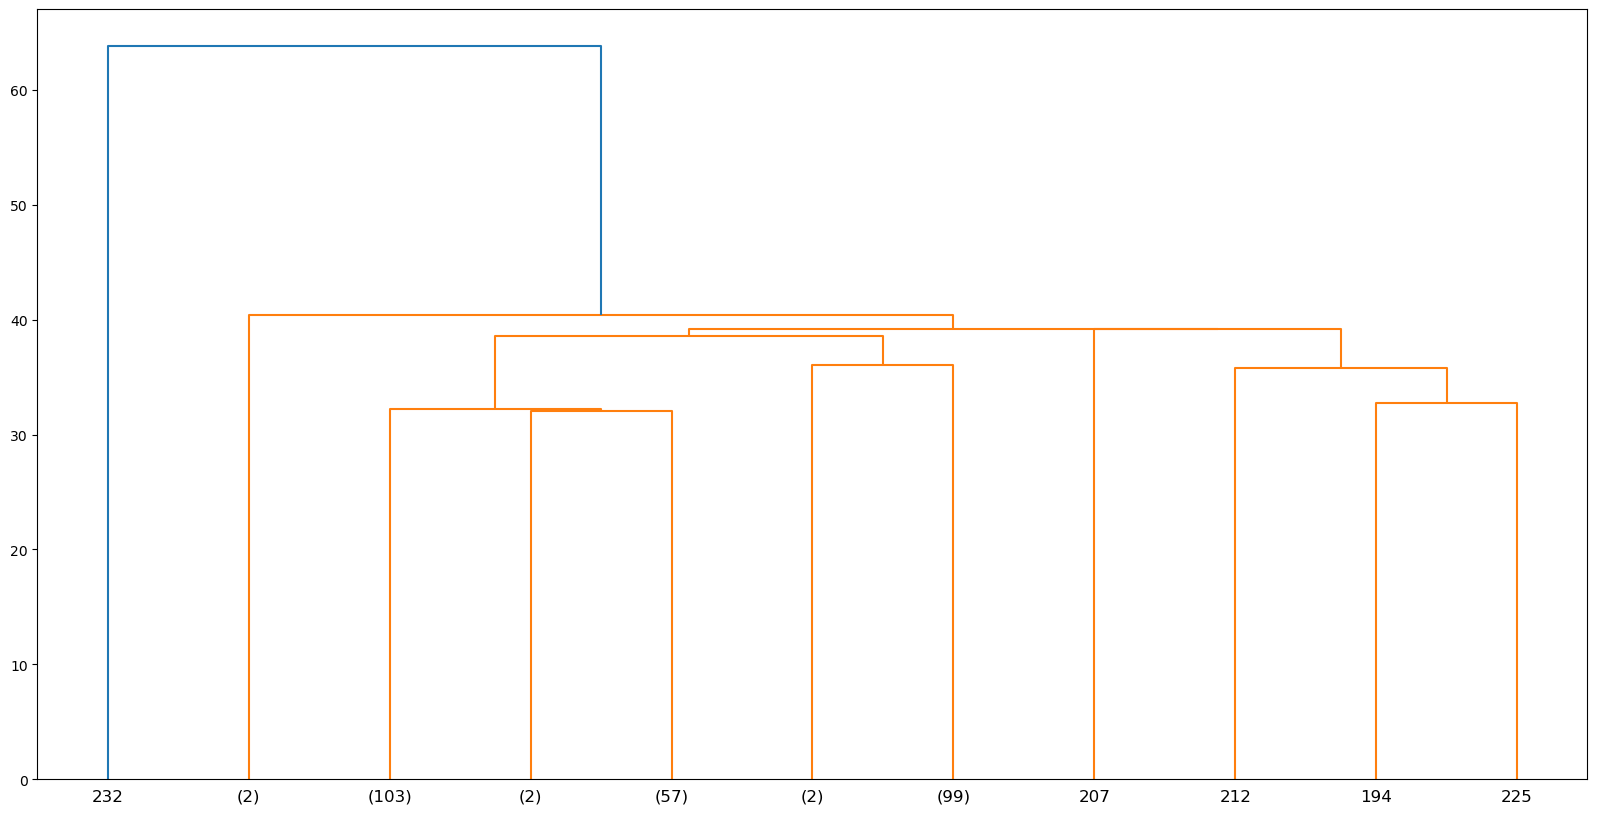

In [30]:
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=11)